# Лабораторная работа 2

## Клепиков Никита

Dataset: Students Performance in Exams

Ссылка на датасет: https://www.kaggle.com/spscientist/students-performance-in-exams

Группа: 6231 - 010402D

## Подключение необходимых библиотек

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Тестовый датафрейм "mpg"

In [2]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Простейшая визуализация с использованиме geom_point по осям displ и hwy

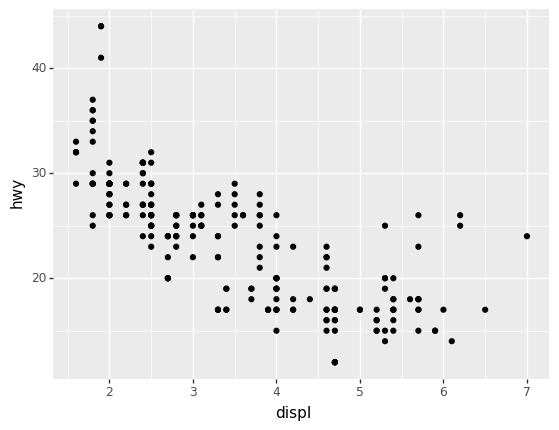

<ggplot: (127951804239)>

In [3]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

### Постройте два графика: в одном из них одна из осей должна быть соответствовать столбцу с элементами-категориями, во втором – обе (например, "class" и "drv")


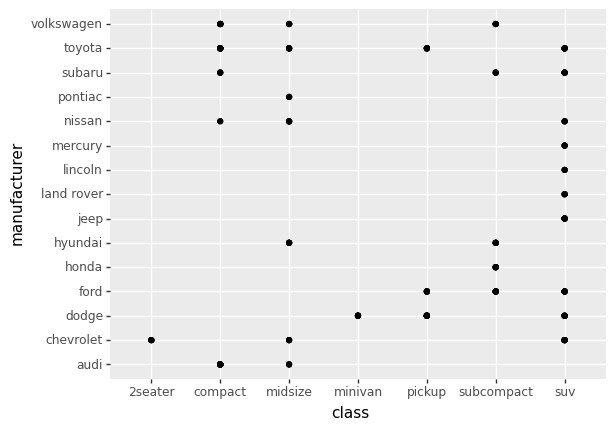

<ggplot: (127952435565)>

In [4]:
ggplot(data=mpg) + geom_point(mapping=aes(x="class", y="manufacturer"))

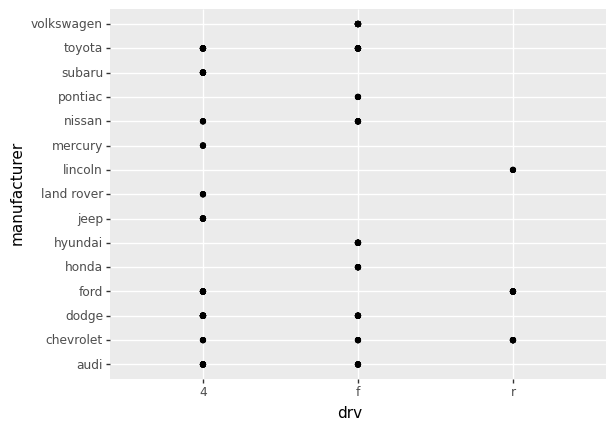

<ggplot: (127952355449)>

In [5]:
ggplot(data=mpg) + geom_point(mapping=aes(x="drv", y="manufacturer"))

## Добавим красок, оттенков и форм в графики

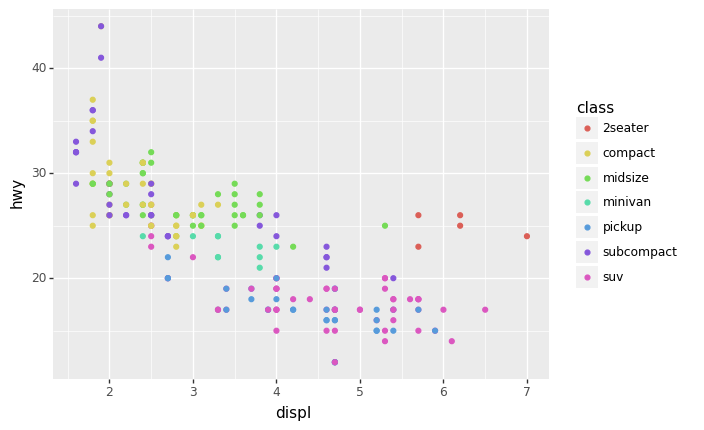

<ggplot: (127952396915)>

In [6]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color="class"))

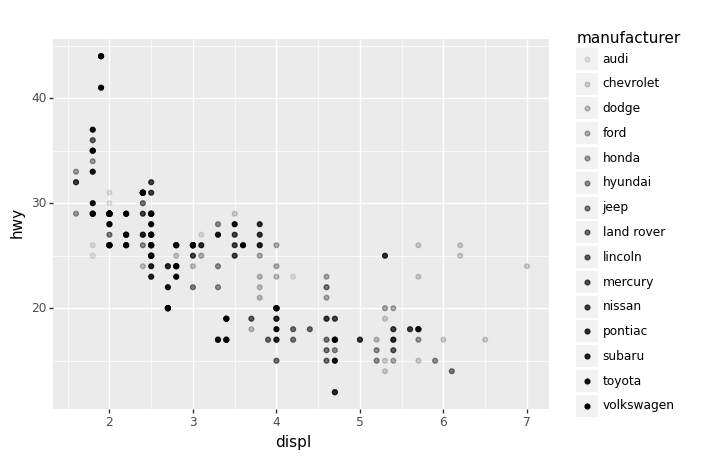

<ggplot: (127952494029)>

In [7]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", alpha="manufacturer"))

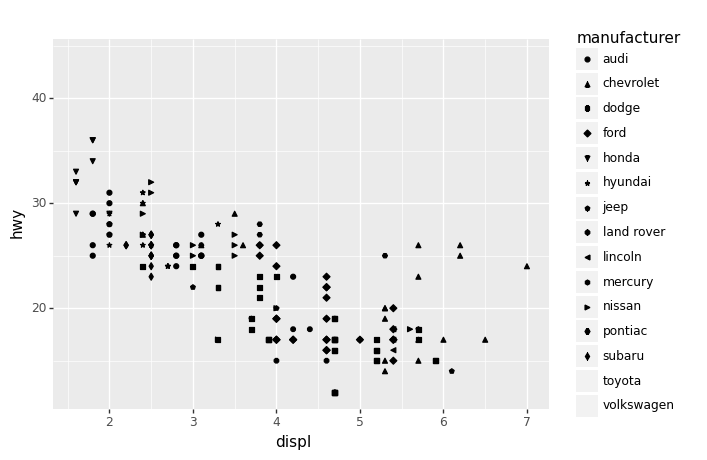

<ggplot: (127952699389)>

In [8]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", shape="manufacturer"))

### Попробуйте сделать два графика: в одном размер точек будет соответствовать столбцу с элементами-категориями, во втором – столбцу с элементами-значениями

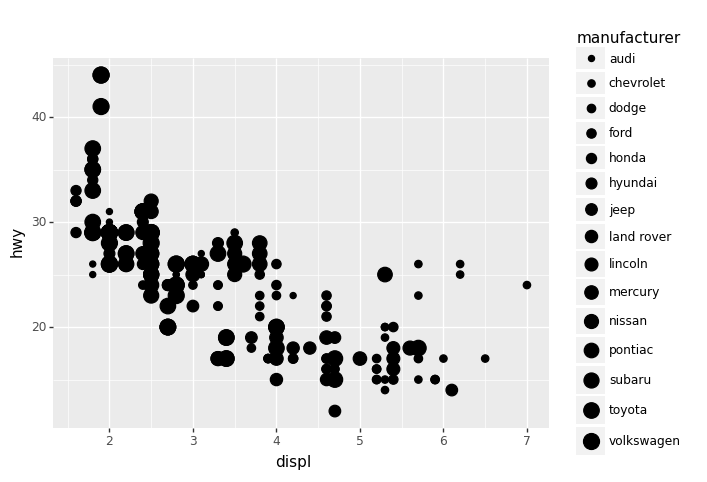

<ggplot: (127952848092)>

In [9]:
ggplot(data=mpg) + geom_point(mapping=aes(x="displ", y="hwy", size="manufacturer"))

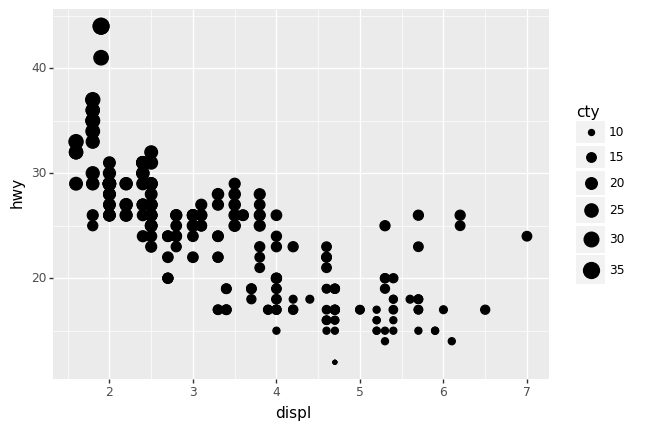

<ggplot: (127953175101)>

In [10]:
ggplot(data=mpg) + geom_point(mapping=aes(x="displ", y="hwy", size="cty"))

## А что если сделать использовать в качестве источника визуального свойства "форма" непрерывную категорию (например hwy)?

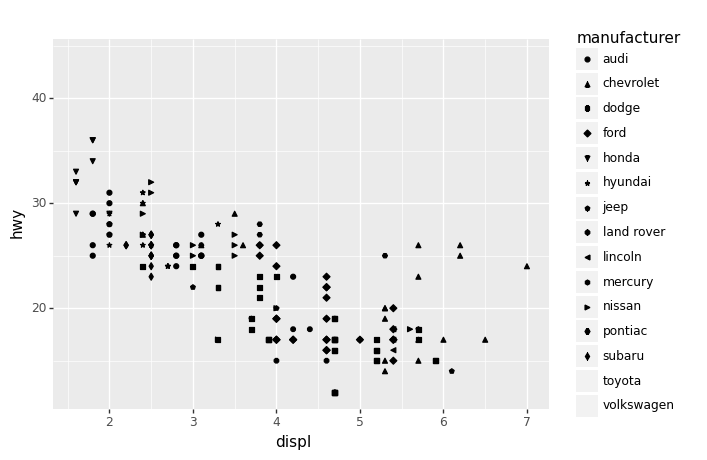

<ggplot: (127953035737)>

In [11]:
ggplot(data=mpg) + geom_point(mapping=aes(x="displ", y="hwy",shape="manufacturer"))

### Попробуйте сделать график с визуальным элементом, заданным условным оператором (например, color="displ < 5")

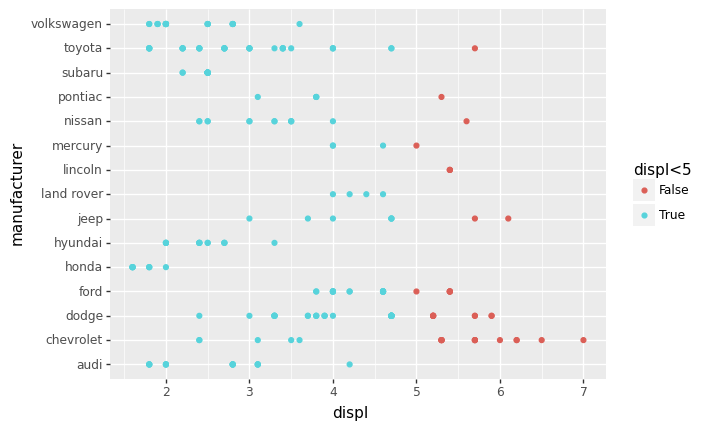

<ggplot: (127953177811)>

In [12]:
ggplot(data=mpg) + geom_point(mapping=aes(x="displ", y="manufacturer", color="displ<5"))

### Попробуйте поэкспериментировать с графиками, где одной категории соответствуют различные визуальные элементы (пример ниже). Попробуйте привести пример, когда это имеет смысл.

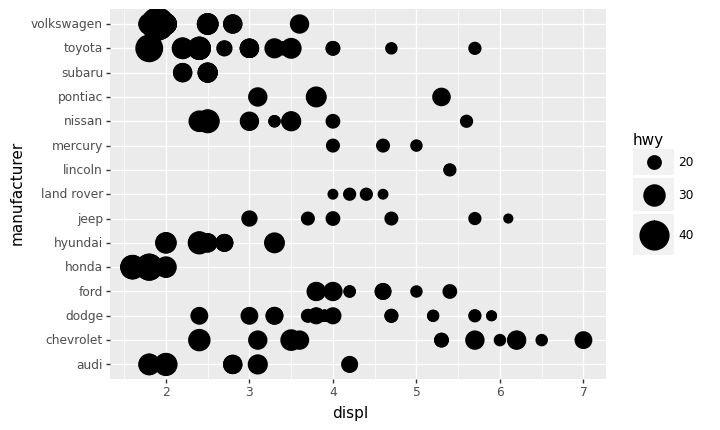

<ggplot: (127952361765)>

In [13]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy"))

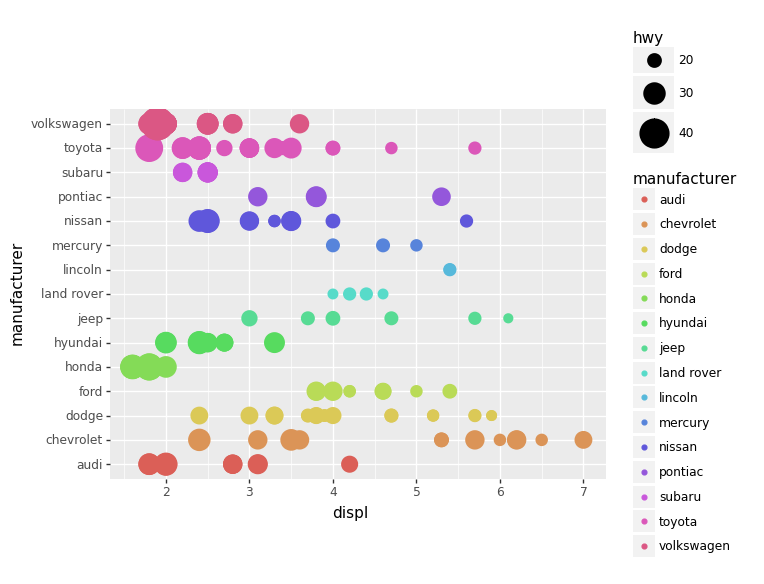

<ggplot: (127953442118)>

In [14]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy", color="manufacturer"))

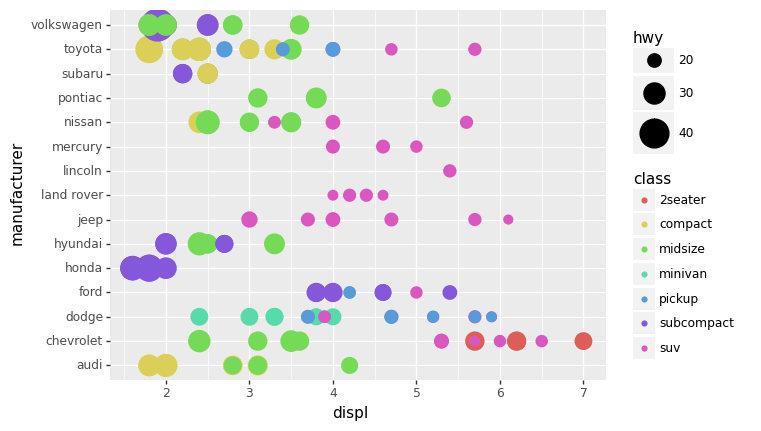

<ggplot: (127953848884)>

In [15]:
ggplot(data=mpg) + geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy", color="class"))

## Использование панелей при визуализации

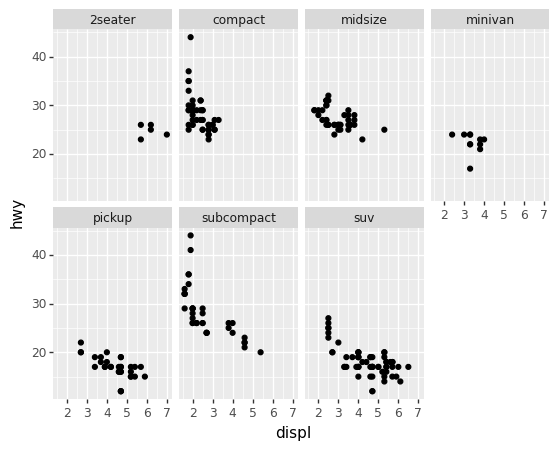

<ggplot: (127953675581)>

In [16]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_wrap("class", nrow=2)

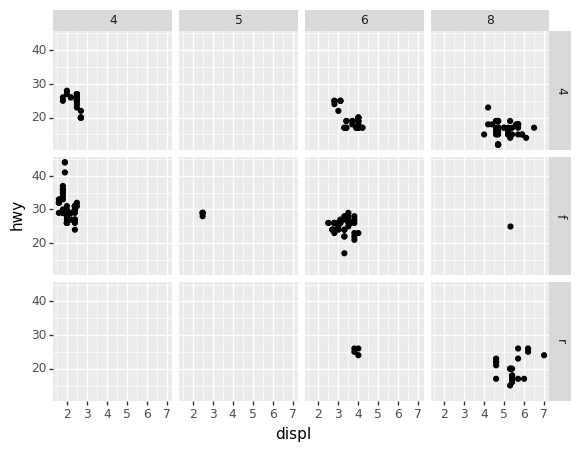

<ggplot: (127955408180)>

In [17]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_grid("drv ~ cyl")

### Что если использовать категорию с непрерывными значениями (например, hwy) для разделения на панели?

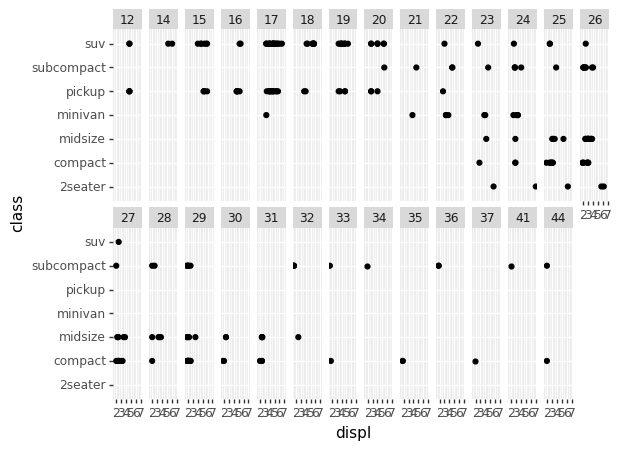

<ggplot: (127952511055)>

In [18]:
ggplot(data=mpg) + geom_point(mapping=aes(x="displ", y="class")) + facet_wrap("hwy", nrow=2)

### Можно сделать только вертикальные или только горизонтальные панели, если использовать конструкцию типа (". ~ <категория>")

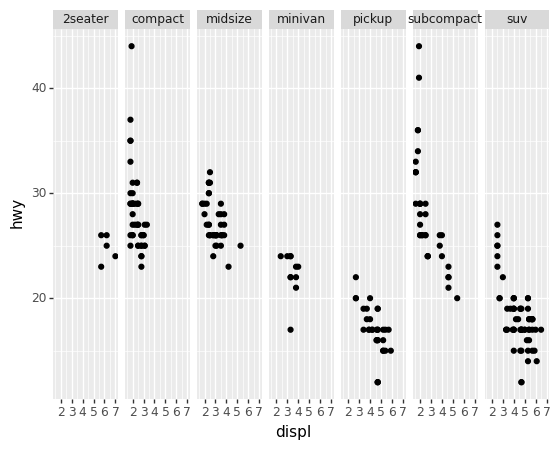

<ggplot: (127953050254)>

In [19]:
ggplot(data=mpg) + geom_point(mapping=aes(x="displ", y="hwy")) + facet_grid(". ~ class")

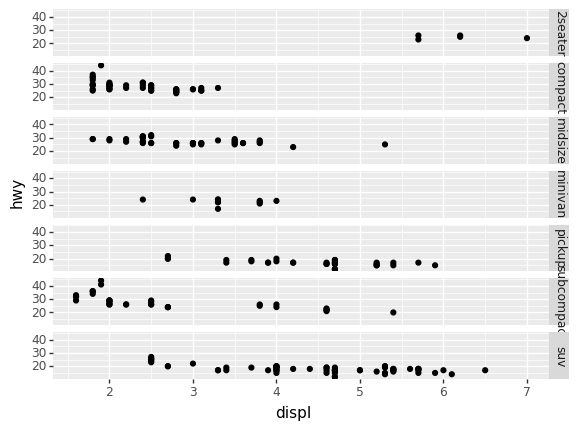

<ggplot: (127953232339)>

In [20]:
ggplot(data=mpg) + geom_point(mapping=aes(x="displ", y="hwy")) + facet_grid("class ~ .")

### Что лучше использовать: цвета или панели? А для большого набора?

## geom_smooth() позволяет получить сглаженную среднюю (в том числе, с доверительным интервалом).abs
### (это не сработает без библиотеки scikit-misc, и может не сработать даже с ней)

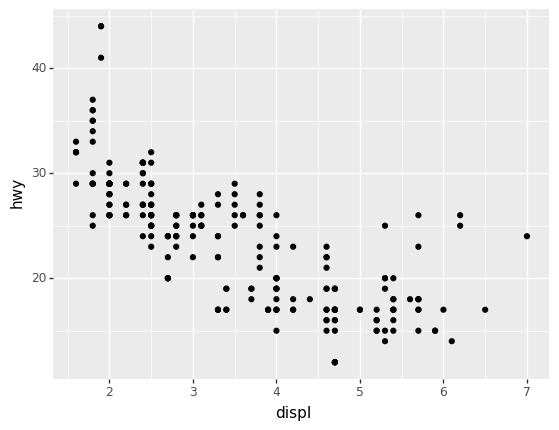

<ggplot: (127955520564)>

In [21]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

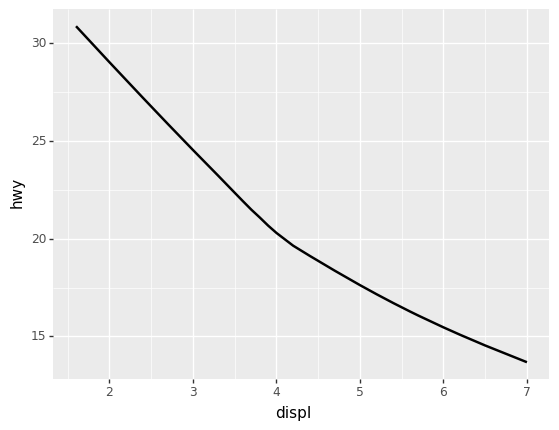

<ggplot: (127953000328)>

In [22]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy"))

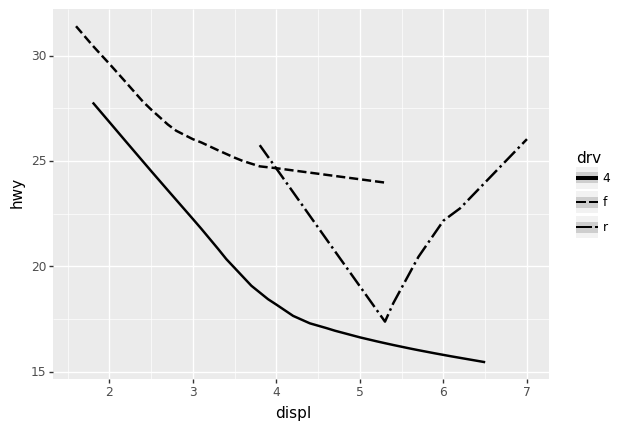

<ggplot: (127955460054)>

In [23]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy", linetype="drv"))

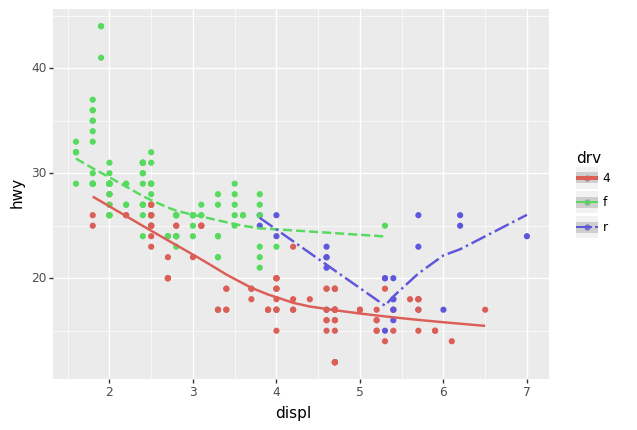

<ggplot: (127953014893)>

In [24]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
geom_point() +\
geom_smooth(mapping=aes(linetype="drv"))

## Визуальные отображения в функции ggplot будут распространяться на все графики. Отдельные свойства каждого геометрического отображения будут относиться только к нему.

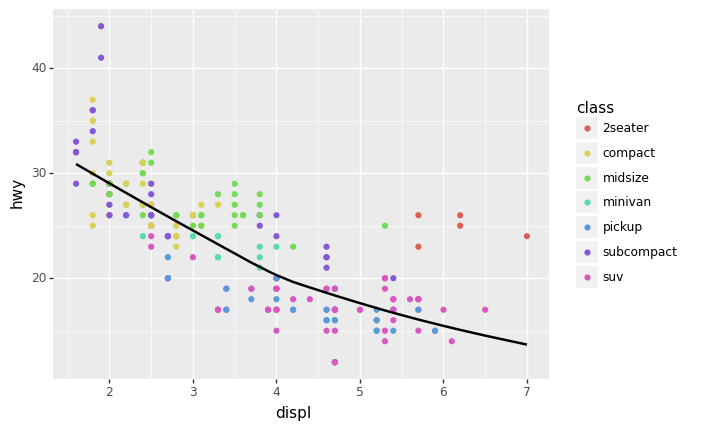

<ggplot: (127955483456)>

In [25]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth()

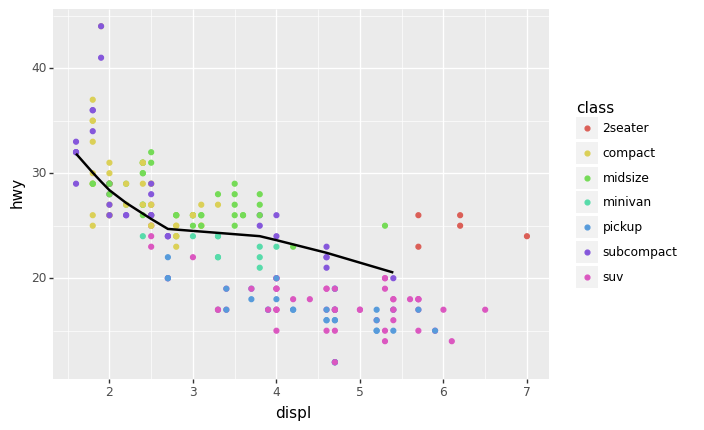

<ggplot: (127955468039)>

In [26]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth(data=mpg.loc[mpg["class"] == "subcompact"], se=False)

## Попробуйте скомбинировать разные свойства разных слоёв

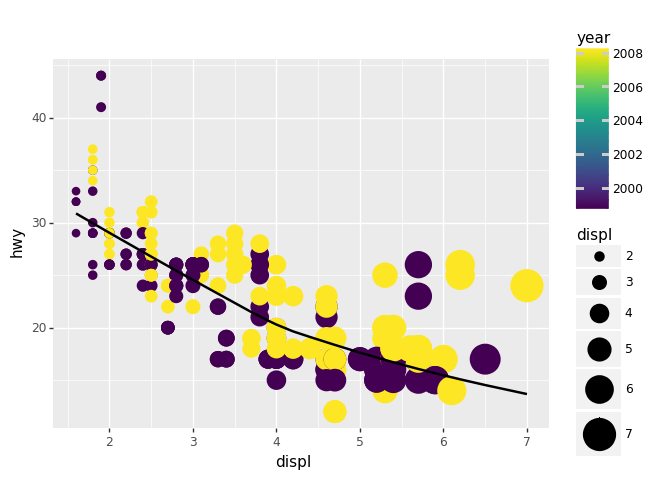

<ggplot: (127953575434)>

In [27]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + geom_point(mapping=aes(color="year", stroke="displ")) + geom_smooth()

# Какое геометрическое отображение вы будете использовать, чтобы нарисовать линейную диаграмму (обычный линейный график)?

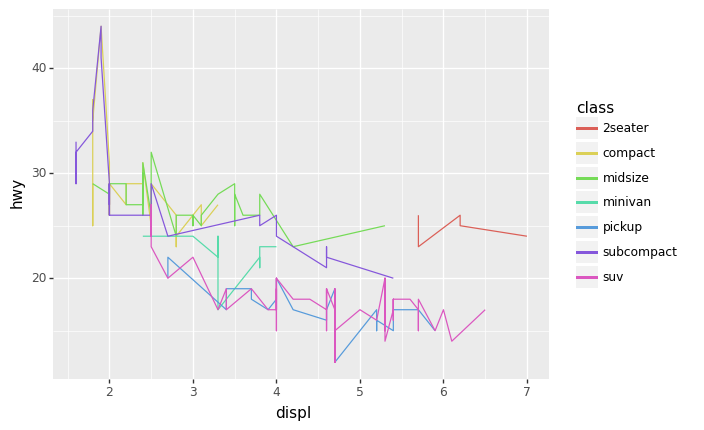

<ggplot: (127953818378)>

In [28]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + geom_line(mapping=aes(color="class"))

### Подберите подходящий код под следующие графики:
<img src="supp/p1.png" alt="Drawing" style="width: 350px;"/>
<img src="supp/p2.png" alt="Drawing" style="width: 350px;"/></br>
<img src="supp/p3.png" alt="Drawing" style="width: 350px;"/>
<img src="supp/p4.png" alt="Drawing" style="width: 350px;"/></br>
<img src="supp/p5.png" alt="Drawing" style="width: 350px;"/>
<img src="supp/p6.png" alt="Drawing" style="width: 350px;"/>

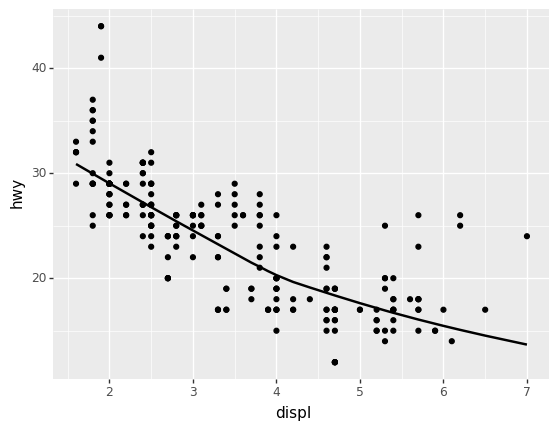

<ggplot: (127955264934)>

In [29]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + geom_point() + geom_smooth()

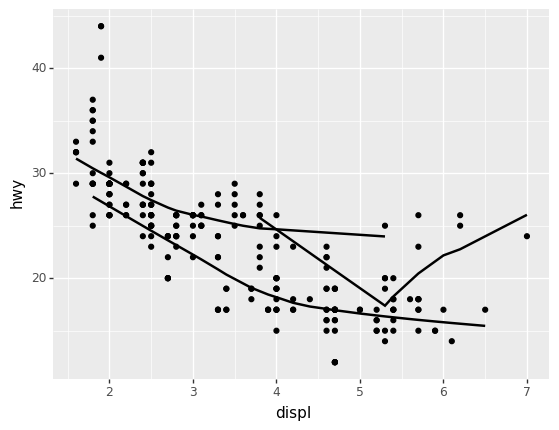

<ggplot: (127955288911)>

In [30]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + geom_point() + geom_smooth(mapping=aes(group="drv"))

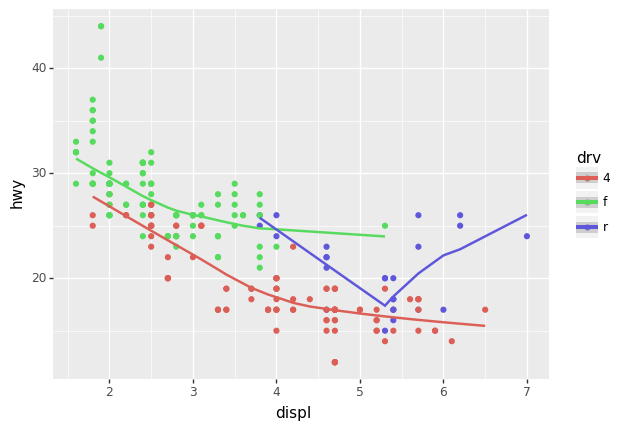

<ggplot: (127955770646)>

In [31]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) + geom_point() + geom_smooth(mapping=aes(color="drv"))

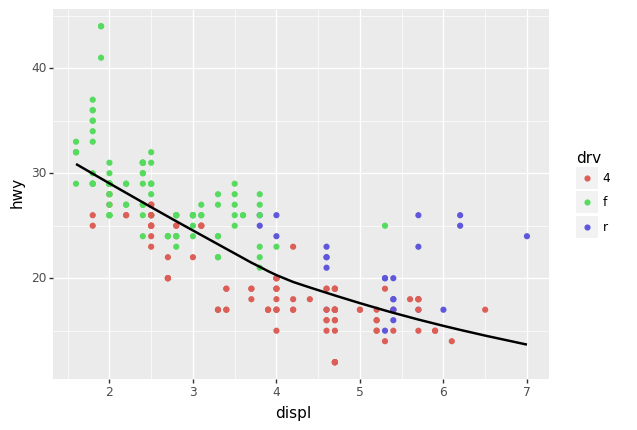

<ggplot: (127955817762)>

In [32]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + geom_point(mapping=aes(color="drv")) + geom_smooth()

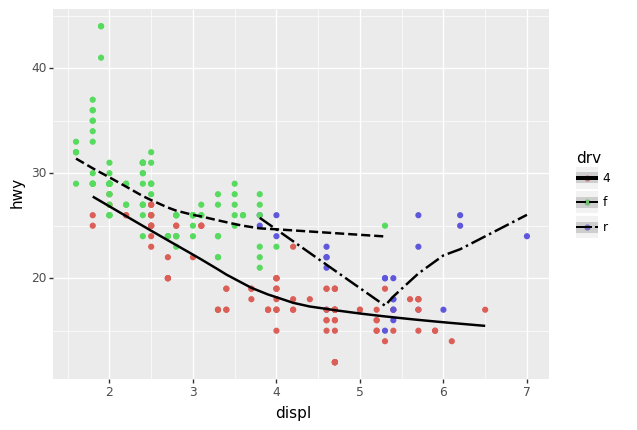

<ggplot: (127955835380)>

In [33]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + geom_point(mapping=aes(color="drv")) + geom_smooth(mapping=aes(linetype="drv"))

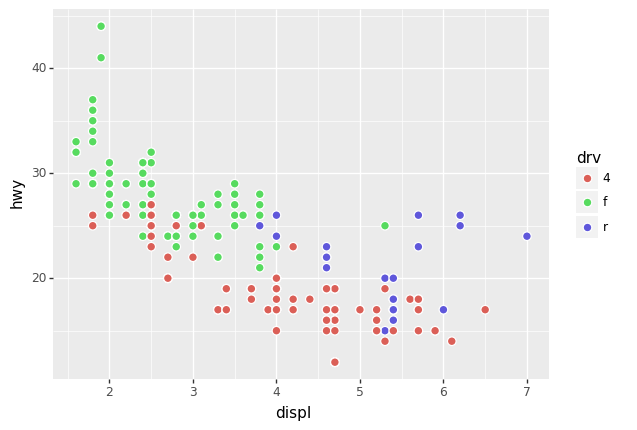

<ggplot: (127955821388)>

In [34]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + geom_point(mapping=aes(fill="drv"), color="white", size=3)

## Статистические свойства элементов категорий

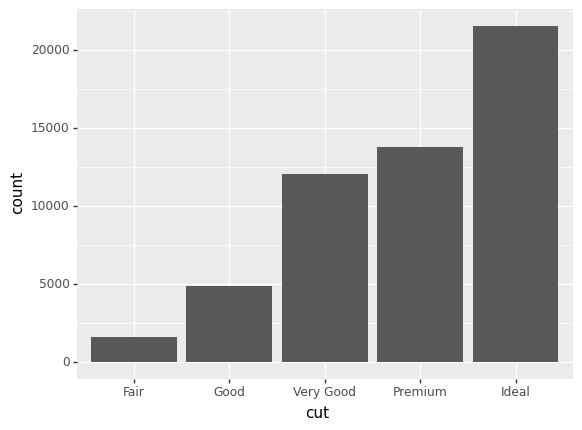

<ggplot: (127955280168)>

In [35]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut"))

### Что делает geom_col()? Чем он отличается от geom_bar()?

* geom_col() составляет высоту столбцов в зависимости от значений y

* geom_bar() составляет высоту в зависимости от встречаемости значений в x и не требует y

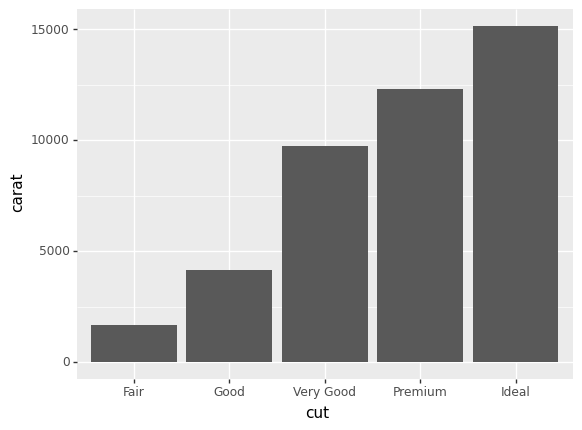

<ggplot: (127953521454)>

In [36]:
ggplot(data=diamonds) + geom_col(mapping=aes(x="cut", y="carat"))

### Что произойдёт, если 
'ggplot(data=diamonds) +\
'geom_bar(mapping=aes(x="cut", y="..prop.."), group=1)
или
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="color", y="..prop.."))
### запустить без "group=1"? Почему?

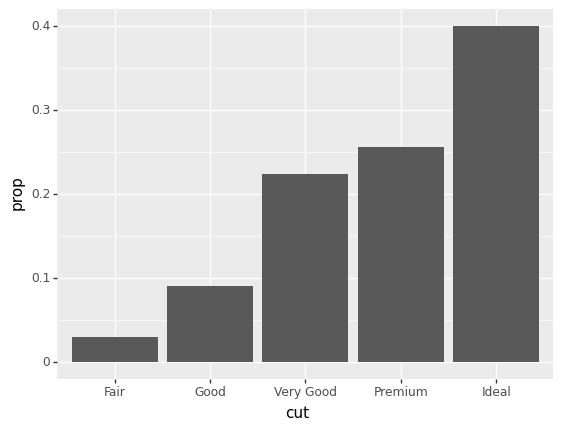

<ggplot: (127953793937)>

In [37]:
ggplot(data=diamonds) + geom_bar(mapping=aes(x="cut", y="..prop.."), group=1)

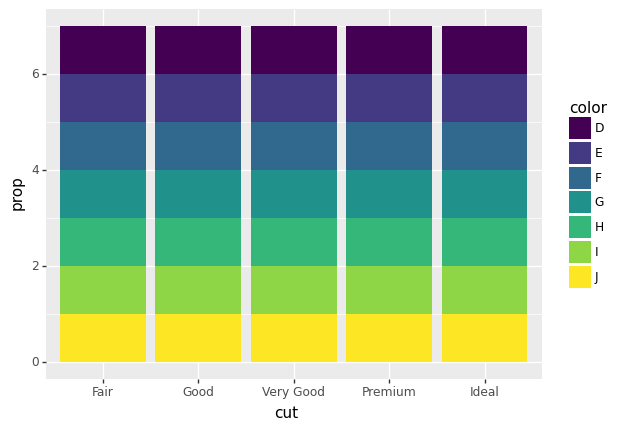

<ggplot: (127955173578)>

In [38]:
ggplot(data=diamonds) + geom_bar(mapping=aes(x="cut", fill="color", y="..prop.."))

* При неиспользовании group=1 все столбцы выравниваются, так как не указано по какой переменной мы считаем частоту для задачи высоты столбцов

* Значение, записанное в y, является лишним

## Модные графики с красивыми цветами

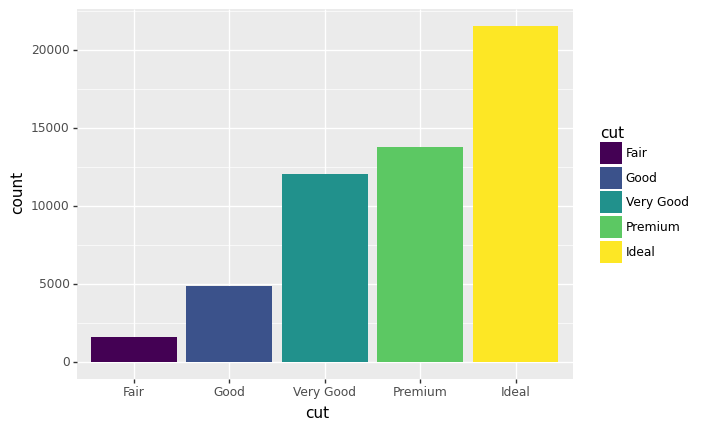

<ggplot: (127952461885)>

In [39]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="cut"))

## При добавлении новых категорий в качестве цвета появляется новая функциональность

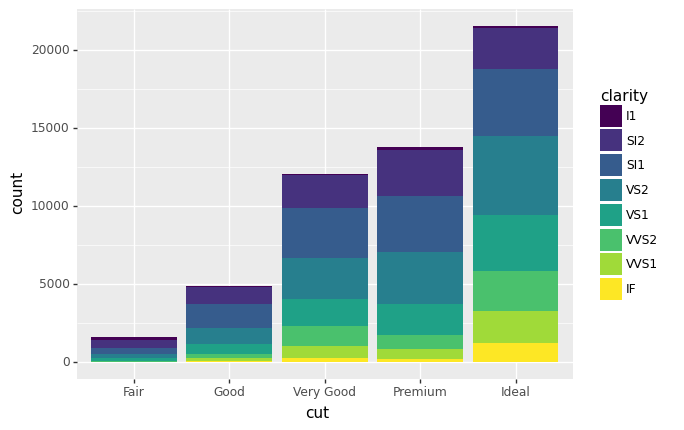

<ggplot: (127953456427)>

In [40]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"))

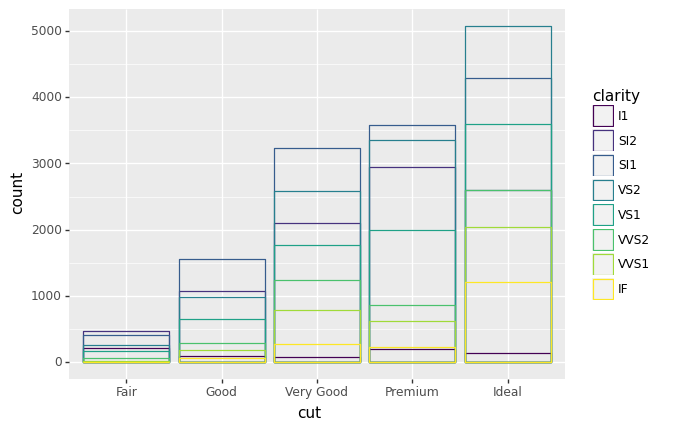

<ggplot: (127953470278)>

In [41]:
ggplot(data=diamonds, mapping=aes(x="cut", colour="clarity")) +\
geom_bar(fill=None, position="identity")

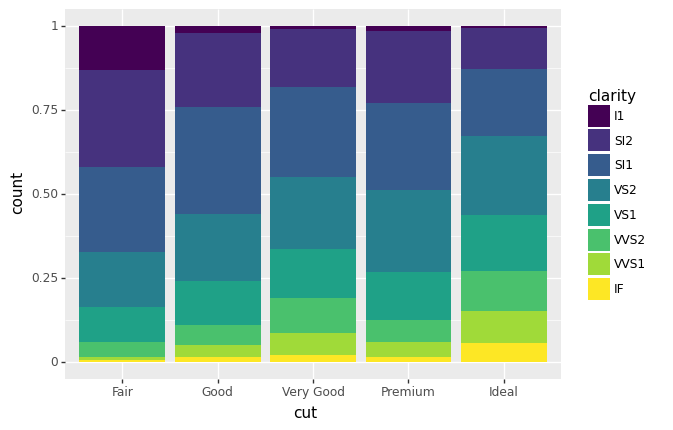

<ggplot: (127952716451)>

In [42]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="fill")

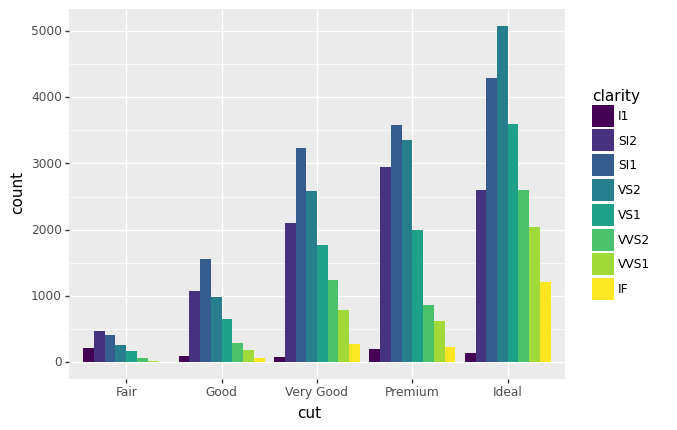

<ggplot: (127952998997)>

In [43]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")

## Добавим jitter в scatter!

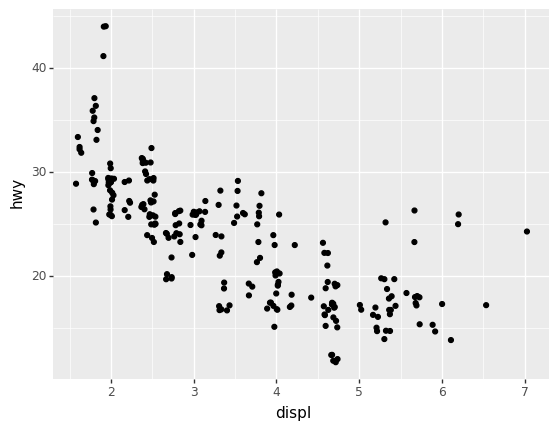

<ggplot: (127955393979)>

In [44]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"), position="jitter")


### Зачем тут coord_fixed()? Что делает geom_abline()?

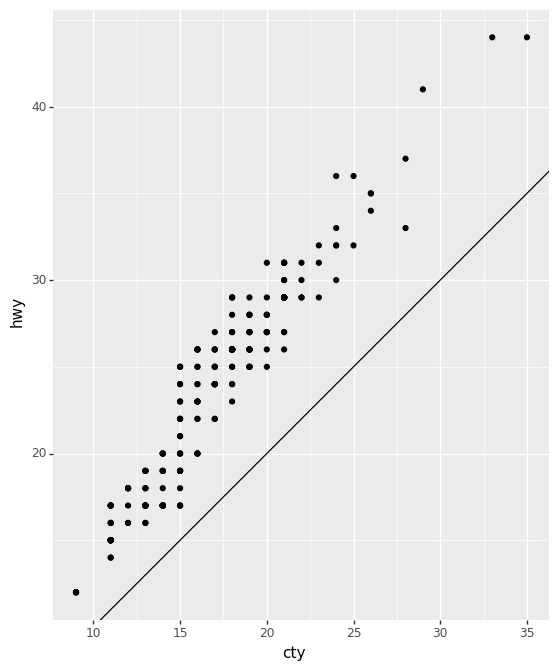

<ggplot: (127952339044)>

In [45]:
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point() +\
geom_abline() +\
coord_fixed()


# Творческое задание
## Попробуйте использовать изученные средства plotnine для своего датасета (необязательно много и пока не надо строить сложные графики)

In [46]:
students = pd.read_csv('Students.csv')
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


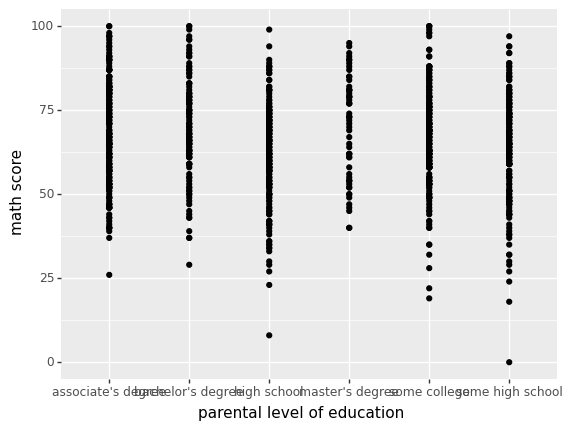

<ggplot: (127953019889)>

In [47]:
ggplot(data=students) + geom_point(mapping=aes(x="parental level of education", y="math score"))

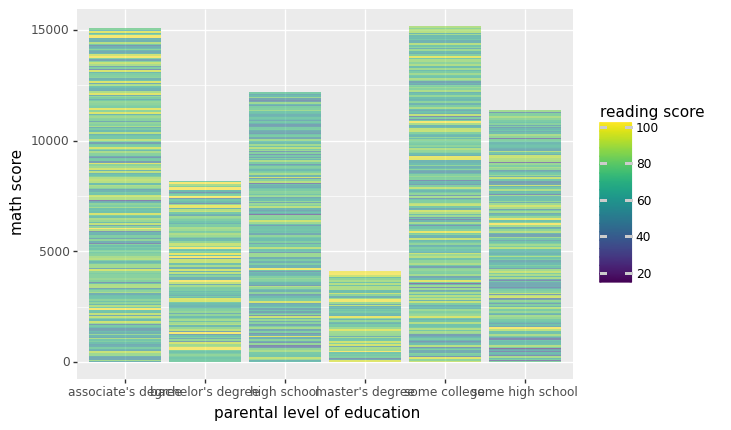

<ggplot: (127955223869)>

In [48]:
ggplot(data=students) + geom_col(mapping=aes(x="parental level of education", y="math score", fill="reading score"), alpha=3/5)